<a href="https://colab.research.google.com/github/Pmalazarepo/Cool/blob/master/AbsaCompetition_final4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Absa Bank Customer Income Prediction Challenge

#1. Introduction

#About the dataset
At the beginning of 2023 Zindi(https://zindi.africa/) coordinated a competition on behalf of a major local bank in South Africa . The competion was closed on 26 February 2023. I have chosen this as my Capstone Project for completing my course with Imperial College Business School.
The requirement is to predict bank customer income based on the provided transaction data and demographics .So this is a regression task to predict an amount with measurement requirement as the Root Mean Square (RMSE) .The transaction data is over a period of 14 months, running from the start of July 2021 to the end of August 2022. There are 5144 customers and 46926 unique accounts, with some customers having more than one account. The number of transactions per customer range from 1 to just over 2 000 for the 14-month period.

The train set contains 3600 customers along with their declared net income and the test data contains the remaining 1544 customers with the declared income excluded.

Along with the train and test files is the transaction history for each customer which details the various transactions each customer engaged in over the entire period of recording. There are also data files containing demographic information on each customer as well as files describing some of the categorical variables related to the customers.


# Importing librarires and Datasets

In [1]:
#Mounting my google drive
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [2]:
# Importing libraries
import warnings
warnings.filterwarnings( "ignore" )
import pathlib as pl
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels import api as sm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [3]:
#Import all data files provided
df_train=pd.read_csv('/content/gdrive/MyDrive/MyData/AbsaBankData2/Train.csv')
df_test=pd.read_csv('/content/gdrive/MyDrive/MyData/AbsaBankData2/Test.csv')
df_Emp_Status=pd.read_csv('/content/gdrive/MyDrive/MyData/AbsaBankData2/employment_status.csv')
df_IncomeGroup=pd.read_csv('/content/gdrive/MyDrive/MyData/AbsaBankData2/income_group.csv')
df_SampleSub=pd.read_csv('/content/gdrive/MyDrive/MyData/AbsaBankData2/SampleSubmission.csv')
df_CustDemo=pd.read_csv('/content/gdrive/MyDrive/MyData/AbsaBankData2/customer.csv')
df_Transactions=pd.read_csv('/content/gdrive/MyDrive/MyData/AbsaBankData2/transactions.csv')


# 2. Exploratory Data Analysis(EDA)


Exploratory Data Analysis is a process of examining or understanding the data and extracting insights or main characteristics of the data. EDA is generally classified into two methods, i.e. graphical analysis and non-graphical analysis.

EDA is very essential because it is a good practice to first understand the problem statement and the various relationships between the data features before getting your hands dirty.So the first part will do a non-graphical analysis and the second part do a graphical (visualisation) on univariate , bivariate and multivariate .

In [ ]:
# Train data comprises 3600 data points with 3 features - so more data needs to be incorporated here for full training of ML.

df_train.head()

,CUSTOMER_IDENTIFIER,RECORD_DATE,DECLARED_NET_INCOME
0,ID_18018255686b76dbc534d0edf0f7b4e9bb6cc3cde15...,2022-07,"13,500"
1,ID_782a96eb5b14b4cedc7df05389c6e4751c087026513...,2022-04,"9,000"
2,ID_fbf3035c5b8e7da652269551c78d634a48bca823076...,2022-06,"8,000"
3,ID_a0081832892639d933929e24ce46203ea417e17ecbe...,2022-08,"7,000"
4,ID_86ee557b2a4506ac40331d40370a40e37e0b95b9f23...,2022-07,"10,400"


In [ ]:
df_train.shape

(3600, 3)

In [ ]:
df_train.columns

Index(['CUSTOMER_IDENTIFIER', 'RECORD_DATE', 'DECLARED_NET_INCOME'], dtype='object')

In [ ]:
# Test data comprises 1544 data points with 2 features - so more data needs to be incorporated here for full training of ML.
df_test.head()

,CUSTOMER_IDENTIFIER,RECORD_DATE
0,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,2022-06
1,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,2022-01
2,ID_94bbc5ce0228e1d25179755dacdf9fc7359a5bbc74a...,2022-05
3,ID_41ccd69246cea3c1b4d9349f21d7af2dd092cf7eed4...,2022-05
4,ID_09e29a91e9369a11075b1fd7fd209f3a0c96fb18432...,2022-03


In [ ]:
df_test.shape

(1544, 2)

In [ ]:
# Employee Status
#These explains the codes used for Employee employment status . It has 4 types of employee status viz Resigned(0),
#Inactive(1),Retiree(2)and Active(3)
df_Emp_Status

,employee_status_code,employee_status_desc
0,0,Resigned
1,3,Active
2,1,Inactive
3,2,Retiree


In [ ]:
df_Emp_Status.employee_status_desc.value_counts()

Resigned    1
Active      1
Inactive    1
Retiree     1
Name: employee_status_desc, dtype: int64

In [ ]:
# Imcome Group
#These explains the codes used for 21 Income Groups from Not Supplied , Low Income to High Income
df_IncomeGroup

,income_group_code,income_group_desc
0,0,NOT SUPPLIED
1,1,R 0 - 499
2,2,R500 - 999
3,3,"R1,000 - 1,999"
4,4,"R2,000 - 2,999"
5,5,"R3,000 - 3,999"
6,6,"R4,000 - 4,999"
7,7,"R5,000 - 5,999"
8,8,"R6,000 - 6,999"
9,9,"R7,000 - 7,999"


In [ ]:
df_IncomeGroup.income_group_code.value_counts()

0     1
1     1
20    1
19    1
18    1
17    1
16    1
15    1
14    1
13    1
12    1
11    1
10    1
9     1
8     1
7     1
6     1
5     1
4     1
3     1
2     1
21    1
Name: income_group_code, dtype: int64

In [ ]:
# Submission File
#This is the Submission Template with only two features viz Customer Identifier and Declared Net Income
df_SampleSub.head()

,CUSTOMER_IDENTIFIER,DECLARED_NET_INCOME
0,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,0
1,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,0
2,ID_94bbc5ce0228e1d25179755dacdf9fc7359a5bbc74a...,0
3,ID_41ccd69246cea3c1b4d9349f21d7af2dd092cf7eed4...,0
4,ID_09e29a91e9369a11075b1fd7fd209f3a0c96fb18432...,0


In [ ]:
# Customer Demographics
#This dataset provides the demographics of each customer ( gender ,age , income group , occupation etc )
df_CustDemo.head()

,CUSTOMER_IDENTIFIER,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE
0,ID_00a7d65f82a6819e79c29a84e805777f0265308b655...,2022-09,1,6,4,7,51
1,ID_09651edcac6c55a5e401062b0c0ef7bbba3f3e49538...,2022-09,0,7,10,3,32
2,ID_17215674e76eb33b47c4dd3ac3392e3e8f1a34b131b...,2022-09,1,7,7,1,41
3,ID_212860dd16c79ea8eae97cc1fc181e6afd4862fceaf...,2022-09,0,13,10,1,44
4,ID_24953f74da44bd0915c4cb78c1d97cbbd66e85bbd91...,2022-08,0,13,6,1,44


In [ ]:
# Transaction data
#This dataset provides the transaction details by customer executed over past 14 months with 847 544 transactions .
#This is the critical dataset that will be merged with the training and test dataset .
df_Transactions.head()

,TRANSACTION_DESCRIPTION,CUSTOMER_IDENTIFIER,RECORD_DATE,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,ACCOUNT_NUMBER,TRANSACTION_REFERENCE
0,NaN,ID_017ba29a4d371608fad8313ff1d46c8bb42ef830ee0...,2022-07-13 00:00:00+02:00,9317537c2329262b5e19d3e29d23422558e519ca8ff0a8...,1857.56,1000.00,11785,SAVE,internet,89fe98c0e6ccddcf9a0368507f02773693e01dfeb6911c...,NaN
1,NaN,ID_017ba29a4d371608fad8313ff1d46c8bb42ef830ee0...,2022-02-26 00:00:00+02:00,9317537c2329262b5e19d3e29d23422558e519ca8ff0a8...,8843.46,-2000.00,11348,SAVE,internet,89fe98c0e6ccddcf9a0368507f02773693e01dfeb6911c...,NaN
2,POS PURCHASE,ID_017ba29a4d371608fad8313ff1d46c8bb42ef830ee0...,2022-07-26 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,23.82,-199.98,148,CHEQ,system,89fe98c0e6ccddcf9a0368507f02773693e01dfeb6911c...,04ae923a903fb07b5c846eb61eda25c4766800f02c2e09...
3,NaN,ID_017ba29a4d371608fad8313ff1d46c8bb42ef830ee0...,2022-03-27 00:00:00+02:00,9317537c2329262b5e19d3e29d23422558e519ca8ff0a8...,198.11,-79.39,11419,SAVE,system,89fe98c0e6ccddcf9a0368507f02773693e01dfeb6911c...,NaN
4,NaN,ID_017ba29a4d371608fad8313ff1d46c8bb42ef830ee0...,2022-05-06 00:00:00+02:00,9317537c2329262b5e19d3e29d23422558e519ca8ff0a8...,13631.60,-200.00,11528,SAVE,atm,89fe98c0e6ccddcf9a0368507f02773693e01dfeb6911c...,NaN


In [4]:
# Grouping Transaction Data by Month
# Convert the "date" column to datetime and convert data from daily to monthly
df_Transactions["RECORD_DATE"] = pd.to_datetime(df_Transactions["RECORD_DATE"])

# Group transactions by customer ID and month, and calculate total amount
grouped_df = df_Transactions.groupby([pd.Grouper(key="RECORD_DATE", freq="M"), "CUSTOMER_IDENTIFIER", "PRODUCT_CODE", "CHANNEL"]).agg({
    "AMT": "sum","ACCOUNT_BALANCE":"sum"}).reset_index()
grouped_df.head()


,RECORD_DATE,CUSTOMER_IDENTIFIER,PRODUCT_CODE,CHANNEL,AMT,ACCOUNT_BALANCE
0,2021-07-31 00:00:00+02:00,ID_09b54380e11d25a687e128ec6a2ff438bf178f156de...,SAVE,atm,-1621.50,40894.44
1,2021-07-31 00:00:00+02:00,ID_09b54380e11d25a687e128ec6a2ff438bf178f156de...,SAVE,internet,-4157.05,33560.70
2,2021-07-31 00:00:00+02:00,ID_09b54380e11d25a687e128ec6a2ff438bf178f156de...,SAVE,system,6602.77,84014.95
3,2021-07-31 00:00:00+02:00,ID_0e8b1ef1ddeb5dcb2d10a3a9997dab555b0a8cdfc7c...,CHEQ,atm,-994.00,17229.12
4,2021-07-31 00:00:00+02:00,ID_0e8b1ef1ddeb5dcb2d10a3a9997dab555b0a8cdfc7c...,CHEQ,internet,-2000.00,1030.25


In [ ]:
# Unique Transaction Types
# Its notable that the Unique Transction Types are not consistent for all customers
# so its not possible to characterise using Unique Transaction Types
pd.set_option('display.max_rows',None)
dt_trans=df_Transactions.TRANSACTION_DESCRIPTION.value_counts().rename_axis('unique_values').to_frame('counts')
dt_trans

,counts
unique_values,
POS PURCHASE,176520
ATM WITHDRAWAL,38907
AIRTIME DEBIT,37079
ACB DEBIT:EXTERNAL,21300
DIGITAL PAYMENT DT,20784
ACB CREDIT,18641
IBANK TRANSFER,11515
LOTTO PURCHASE,11453
CASHSEND DIGITAL,9658


# Test Data

So most of the key information is sittinng in different dataset . Will get these datasets combined with the main training and test dataset.

In [5]:
# Merging Test Data with Monthly Grouped Transaction Data
df_test=pd.merge(df_test, grouped_df, on='CUSTOMER_IDENTIFIER')
df_test=pd.merge(df_test,df_CustDemo,on='CUSTOMER_IDENTIFIER')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24563 entries, 0 to 24562
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype                                
---  ------                    --------------  -----                                
 0   CUSTOMER_IDENTIFIER       24563 non-null  object                               
 1   RECORD_DATE_x             24563 non-null  object                               
 2   RECORD_DATE_y             24563 non-null  datetime64[ns, pytz.FixedOffset(120)]
 3   AMT                       24563 non-null  float64                              
 4   ACCOUNT_BALANCE           24563 non-null  float64                              
 5   DATE_LAST_UPDATED         24563 non-null  object                               
 6   SEX_CODE                  24563 non-null  int64                                
 7   INCOME_GROUP_CODE         24563 non-null  int64                                
 8   NUMBER_OF_ACCOUNTS        24563 non-

# Training Data

So most of the key information is sittinng in different dataset . Will get these datasets combined with the main training and test dataset.

In [6]:
# Merging Train Data with Monthly Grouped Transaction Data
df_train=pd.merge(df_train, grouped_df, on='CUSTOMER_IDENTIFIER')
df_train=pd.merge(df_train,df_CustDemo,on='CUSTOMER_IDENTIFIER')

In [ ]:
df_train.shape

(56543, 14)

# Missing items (NA's)
There is no missing values .

In [ ]:
df_train.isnull().sum()

CUSTOMER_IDENTIFIER         0
RECORD_DATE_x               0
DECLARED_NET_INCOME         0
RECORD_DATE_y               0
PRODUCT_CODE                0
CHANNEL                     0
AMT                         0
ACCOUNT_BALANCE             0
DATE_LAST_UPDATED           0
SEX_CODE                    0
INCOME_GROUP_CODE           0
NUMBER_OF_ACCOUNTS          0
OCCUPATIONAL_STATUS_CODE    0
AGE                         0
dtype: int64

## Some Feature Changes


In [7]:
df_train3=df_train.copy()

In [ ]:
#Convert Declared Income from object to numeric float to enable ML modelling
df_train3['DECLARED_NET_INCOME']=df_train3['DECLARED_NET_INCOME'].str.replace(',','')
df_train3['DECLARED_NET_INCOME']=pd.to_numeric(df_train3['DECLARED_NET_INCOME'])
df_train3['DECLARED_NET_INCOME']=df_train3['DECLARED_NET_INCOME'].astype('float64')
df_train3['DECLARED_NET_INCOME'].head()

0    13500.0
1    13500.0
2    13500.0
3    13500.0
4     9000.0
Name: DECLARED_NET_INCOME, dtype: float64

In [ ]:
df_train3.head()

,CUSTOMER_IDENTIFIER,RECORD_DATE_x,TRANSACTION_DESCRIPTION,RECORD_DATE_y,ACCOUNT_TYPE_CODE,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,PRODUCT_CODE,CHANNEL,...,TRANSACTION_REFERENCE,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,DECLARED_NET_INCOME,RECEIPTS,PAYMENTS
0,ID_18018255686b76dbc534d0edf0f7b4e9bb6cc3cde15...,2022-07,ATM WITHDRAWAL,2022-07-21 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,35789.84,-5000.0,110,CHEQ,atm,...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-07,0,15,7,1,45,13500.0,0.0,-5000.0
1,ID_18018255686b76dbc534d0edf0f7b4e9bb6cc3cde15...,2022-07,ATM WITHDRAWAL,2022-06-30 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,825.00,-4000.0,73,CHEQ,atm,...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-07,0,15,7,1,45,13500.0,0.0,-4000.0
2,ID_18018255686b76dbc534d0edf0f7b4e9bb6cc3cde15...,2022-07,ATM TRANSFER,2022-06-29 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,4825.00,4825.0,72,CHEQ,atm,...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-07,0,15,7,1,45,13500.0,4825.0,0.0
3,ID_18018255686b76dbc534d0edf0f7b4e9bb6cc3cde15...,2022-07,ATM WITHDRAWAL,2022-07-21 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,36789.84,-4000.0,112,CHEQ,atm,...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-07,0,15,7,1,45,13500.0,0.0,-4000.0
4,ID_18018255686b76dbc534d0edf0f7b4e9bb6cc3cde15...,2022-07,ATM WITHDRAWAL,2022-07-26 00:00:00+02:00,e92177da406abc0e0a5bce83e853dbdb4e792af521a0ae...,28789.84,-4000.0,115,CHEQ,atm,...,f90ddd77e400dfe6a3fcf479b00b1ee29e7015c5bb8cd7...,2022-07,0,15,7,1,45,13500.0,0.0,-4000.0


In [8]:
# Perform one-hot encoding
PRODUCT = pd.get_dummies(df_train3['PRODUCT_CODE'])
CHANNEL = pd.get_dummies(df_train3['CHANNEL'])

# Drop the original categorical columns
df_train3 = df_train3.drop(['PRODUCT_CODE', 'CHANNEL'], axis=1)

# Concatenate the encoded columns with the original DataFrame
df_train3 = pd.concat([df_train3, PRODUCT, CHANNEL], axis=1)


In [9]:
#Convert Declared Income from object to numeric float to enable ML modelling
df_train['DECLARED_NET_INCOME']=df_train['DECLARED_NET_INCOME'].str.replace(',','')
df_train['DECLARED_NET_INCOME']=pd.to_numeric(df_train['DECLARED_NET_INCOME'])
df_train['DECLARED_NET_INCOME']=df_train['DECLARED_NET_INCOME'].astype('float64')
df_train['DECLARED_NET_INCOME'].head()

0    13500.0
1    13500.0
2    13500.0
3    13500.0
4     9000.0
Name: DECLARED_NET_INCOME, dtype: float64

In [ ]:
#Summary statistics for numerical features
df_train.describe()

,ACCOUNT_BALANCE,AMT,EVENT_NUMBER,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,DECLARED_NET_INCOME
count,595645.000000,595645.000000,595645.000000,595645.000000,595645.000000,595645.000000,595645.000000,595645.000000,595645.000000
mean,5306.374199,11.880090,6450.060756,0.437821,12.224634,10.959813,1.414190,36.068501,15320.896171
std,6984.042433,3067.724793,7189.330528,0.496119,3.843995,4.460512,1.467946,10.382429,9053.067924
min,-2499.970000,-90000.000000,2.000000,0.000000,0.000000,2.000000,0.000000,16.000000,1300.000000
25%,705.410000,-400.000000,1410.000000,0.000000,10.000000,8.000000,1.000000,28.000000,8400.000000
50%,2625.950000,-120.000000,4083.000000,0.000000,13.000000,10.000000,1.000000,34.000000,13700.000000
75%,7108.960000,-29.000000,9115.000000,1.000000,15.000000,14.000000,1.000000,43.000000,19600.000000
max,49974.680000,51027.040000,51348.000000,1.000000,21.000000,38.000000,9.000000,83.000000,95600.000000


# Visualisations


## Univariate

Uni means one and variate means variable, so in univariate analysis, there is only one variable. The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it. In a dataset, it explores each variable separately. It is possible for two kinds of variables- Categorical and Numerical.

In [ ]:
# Overview of Train dataset
# comprises 595 645 records and 19 features of which Declared Income is the Target Variable
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 595645 entries, 0 to 595644
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   CUSTOMER_IDENTIFIER       595645 non-null  object 
 1   RECORD_DATE_x             595645 non-null  object 
 2   TRANSACTION_DESCRIPTION   331961 non-null  object 
 3   RECORD_DATE_y             595645 non-null  object 
 4   ACCOUNT_TYPE_CODE         595645 non-null  object 
 5   ACCOUNT_BALANCE           595645 non-null  float64
 6   AMT                       595645 non-null  float64
 7   EVENT_NUMBER              595645 non-null  int64  
 8   PRODUCT_CODE              595645 non-null  object 
 9   CHANNEL                   595645 non-null  object 
 10  ACCOUNT_NUMBER            595645 non-null  object 
 11  TRANSACTION_REFERENCE     331961 non-null  object 
 12  DATE_LAST_UPDATED         595645 non-null  object 
 13  SEX_CODE                  595645 non-null  i

In [ ]:
#create copy of df_train for plotting
df_plot=df_train.copy()

In [ ]:
df_plot.columns

Index(['CUSTOMER_IDENTIFIER', 'RECORD_DATE_x', 'DECLARED_NET_INCOME',
       'RECORD_DATE_y', 'PRODUCT_CODE', 'CHANNEL', 'AMT', 'ACCOUNT_BALANCE',
       'DATE_LAST_UPDATED', 'SEX_CODE', 'INCOME_GROUP_CODE',
       'NUMBER_OF_ACCOUNTS', 'OCCUPATIONAL_STATUS_CODE', 'AGE'],
      dtype='object')

In [ ]:
# Removing redundant and irrelevant features for plotting
df_plot=df_plot.drop(['CUSTOMER_IDENTIFIER','RECORD_DATE_x','RECORD_DATE_y',],axis=1)

In [ ]:
# Numerical Variables

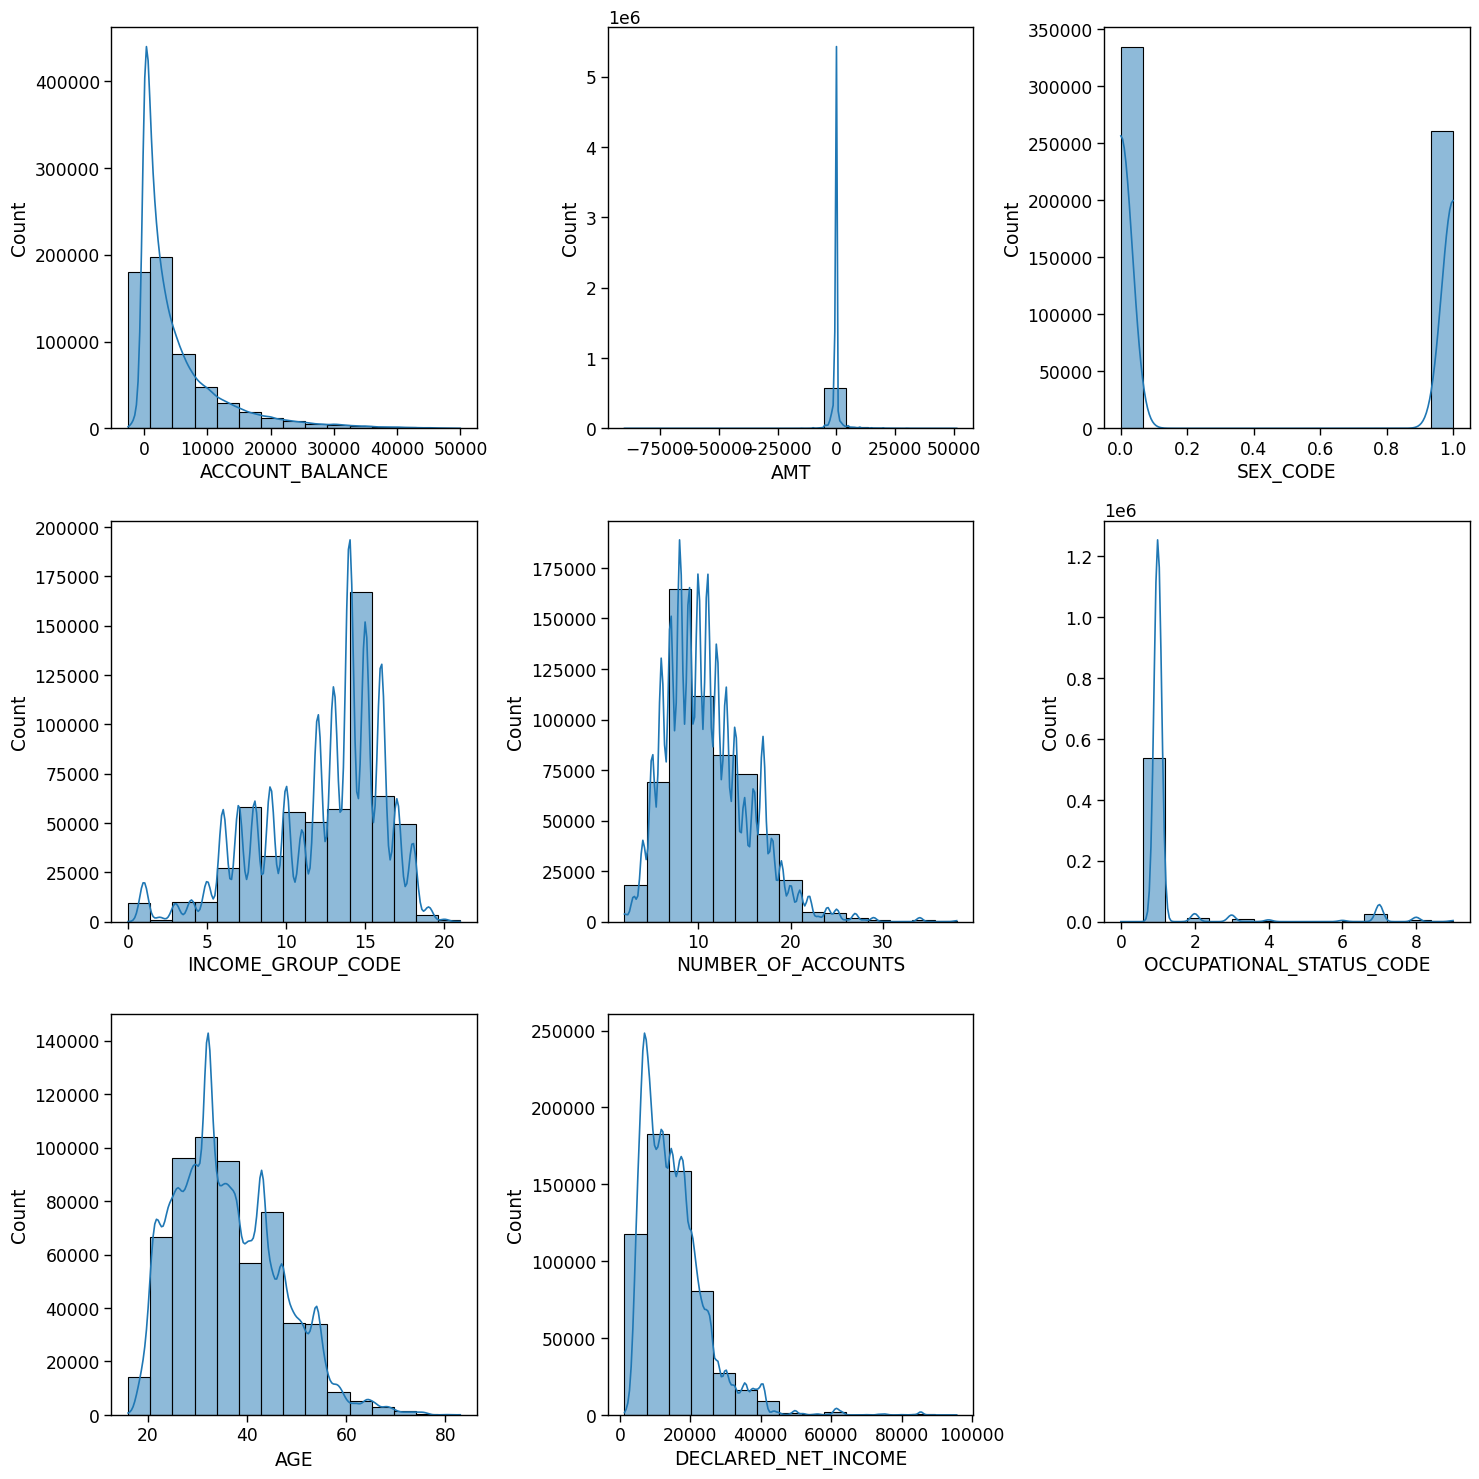

In [ ]:
cols = 3
rows = 3
num_cols = df_plot.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):

    ax=fig.add_subplot(rows,cols,i+1)

    sns.histplot(x = df_plot[col], ax = ax,kde=True,bins=15)

fig.tight_layout()
plt.show()

# Comments on Numerical univariates
Account balance - majority of account balances hover around zero and less than R10,000 .Also the Account_Balance distribution shows a character of a skewed distribution . So it may need some lognormal transformation.
Amt - this represents the net movement in the acoount and hovers around zero. This appears to be a net of Receipts and Payments. It needs to be unpacked into gross Receipts and Payments separately . A separate column or feature for each .
Sex_Code - Gender coded as zero appears more dominant in the dataset. There is no information on what Gender this is .
Income_Group - majority is sitting the range of 12 (R10,000-R11,999) to 16 (R25,000-R33,999) income level
Number_Of_Accounts - It seems the majority holds at least 5 to 15 accounts
Occupational_Status_Code - Its seems the majority are coded 1 ( Inactive ) which seems abnormal . There is codes above 3(e.g. codes 4 to 8) which is not covered in the code list .
Age - dominant age group hovers around 30 years . There seems to be two peaks at 30 and 45.This seems to be a multimodal distribution indicating significantly different clusters or segments in the dataset .
Declared Income - predominatly less than R10,000-R15,000. This distribution also show a lognormal character .



In [ ]:
#Categorical Variables

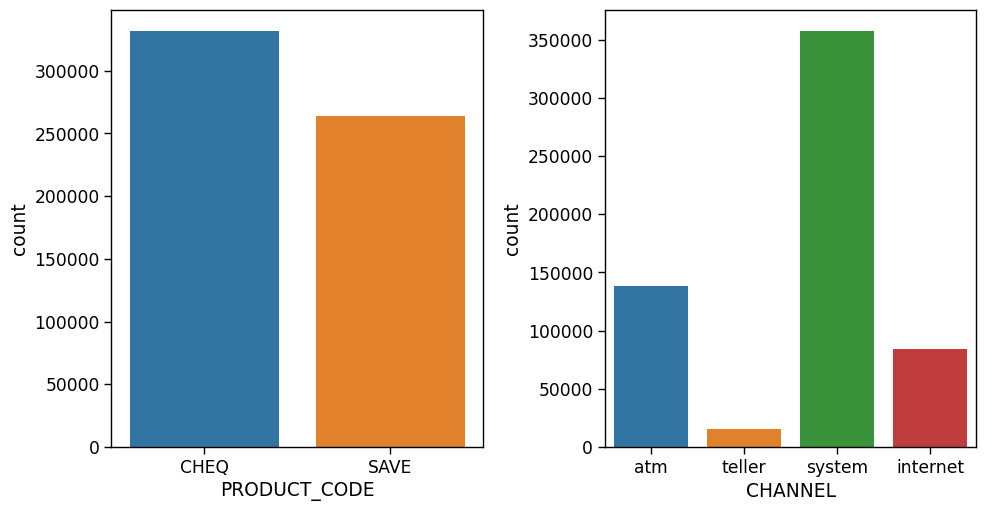

In [ ]:
cols = 3
rows = 3
num_cols = df_plot.select_dtypes(exclude=['int64','float64']).columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):

    ax=fig.add_subplot(rows,cols,i+1)

    sns.countplot(x = df_plot[col], ax = ax)

fig.tight_layout()
plt.show()

# Product Code and Channel Comments

 So most transactions are executed via internal System ( ACB ,debit orders , stop orders etc ) followed by ATM and Internet. Also most transactions are executed via Cheque Account which is normal .

<Axes: xlabel='SEX_CODE', ylabel='count'>

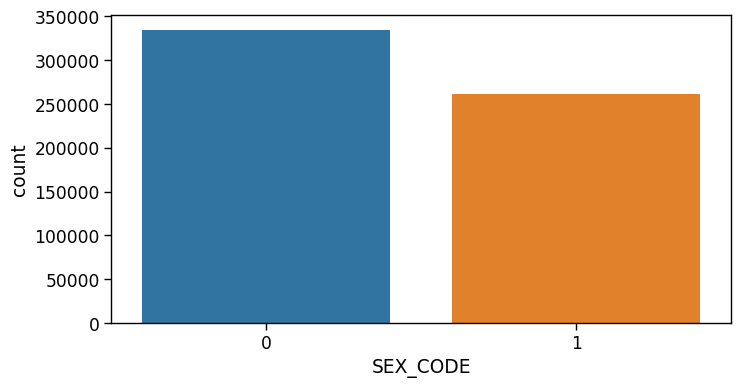

In [ ]:
#Sex-Code
plt.figure(figsize=(8,4))
sns.set_context('paper',font_scale=1.4)
sns.countplot(data=df_train,x=df_train['SEX_CODE'].astype('category',copy=False))

# Sex_Code ciomments
Gender coded as zero appears more dominant in the dataset. There is no information on what Gender this is .

<Axes: xlabel='OCCUPATIONAL_STATUS_CODE', ylabel='count'>

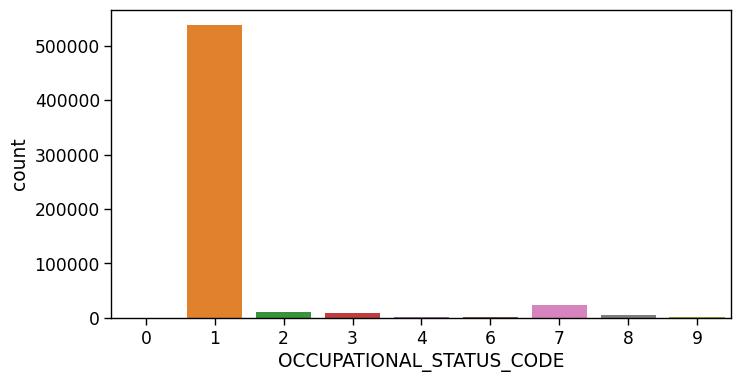

In [ ]:
#Occupational_Status Code
plt.figure(figsize=(8,4))
sns.set_context('paper',font_scale=1.4)
sns.countplot(data=df_train,x=df_train['OCCUPATIONAL_STATUS_CODE'].astype('category',copy=False))

# Occupational_Status_Code comments
Its seems the majority are coded 1 ( Inactive ) which seems abnormal . There is codes above 3(e.g. codes 4 to 8) which is not covered in the code list provided .

<Axes: xlabel='INCOME_GROUP_CODE', ylabel='count'>

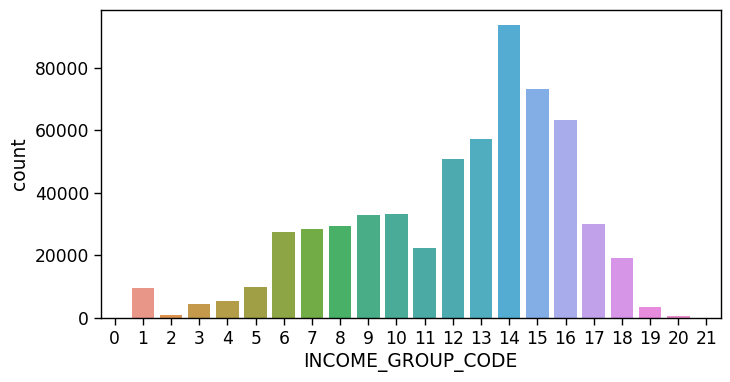

In [ ]:
#Occupational_Status Code
plt.figure(figsize=(8,4))
sns.set_context('paper',font_scale=1.4)
sns.countplot(data=df_train,x=df_train['INCOME_GROUP_CODE'].astype('category',copy=False))

# Income_Group comments
majority is sitting the range of 12 (R10,000-R11,999) to 16 (R25,000-R33,999) income level

<Axes: xlabel='NUMBER_OF_ACCOUNTS', ylabel='count'>

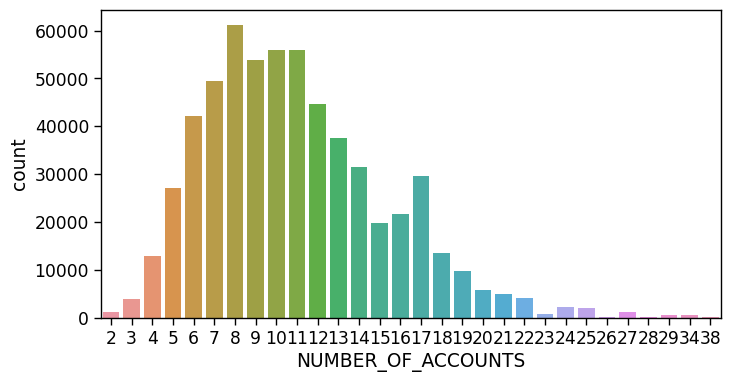

In [ ]:
# NUMBER_OF_ACCOUNTS
plt.figure(figsize=(8,4))
sns.set_context('paper',font_scale=1.4)
sns.countplot(data=df_train,x=df_train['NUMBER_OF_ACCOUNTS'].astype('category',copy=False))

# NUMBER_OF_ACCOUNTS comments
It seems the majority holds at least 5 to 13 accounts .

## Bivariate

Bi means two and variate means variable, so here there are two variables. The analysis is related to cause and the relationship between the two variables. There are three types of bivariate analysis.
- Numerical to Numerical
- Numerical to Categorical
- Categorical to Categorical


<Axes: xlabel='AGE', ylabel='SEX_CODE'>

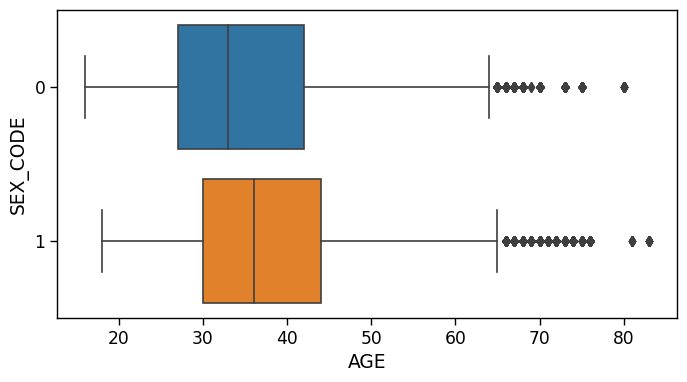

In [ ]:
#Age
plt.figure(figsize=(8,4))
sns.set_context('paper',font_scale=1.4)
sns.boxplot(data=df_train , x=df_train.AGE,y=df_train['SEX_CODE'].astype('category',copy=False))

# Age and Gender comments
Its seems whilst both Genders have outliers in the Ages , Gender code zero (o)is generally younger than Gender code 1 .

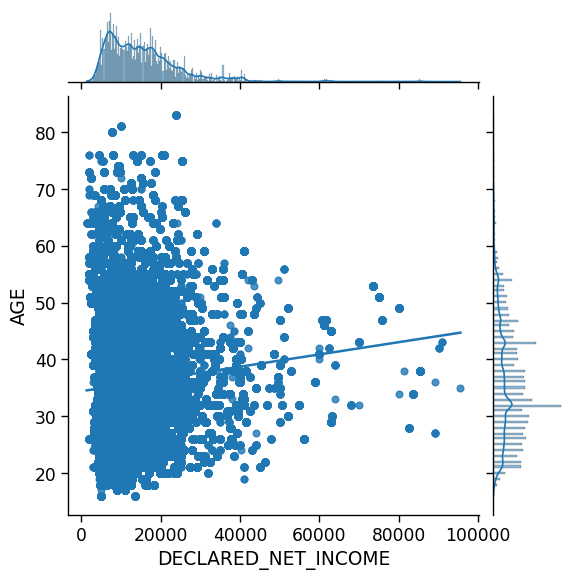

In [ ]:
#Gender and Declared Income

sns.jointplot(data=df_train,x='DECLARED_NET_INCOME',y='AGE',kind='reg')

# Age and Declared_Net_Income comments
There is no significant relationship between Age and Declared_Net_Income .But in the age from about 35 there is some small connection between age and net income. But nothing to write home about.

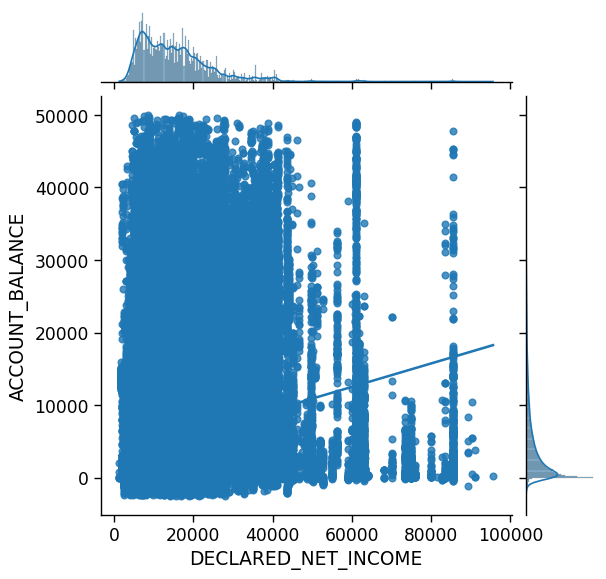

In [ ]:
#Balance and Declared Net Income
sns.jointplot(data=df_train,x='DECLARED_NET_INCOME',y='ACCOUNT_BALANCE',kind='reg')

# Balance and Declared Net Income comments
There is some small relationship between Account_balance and Declared_Net_Income

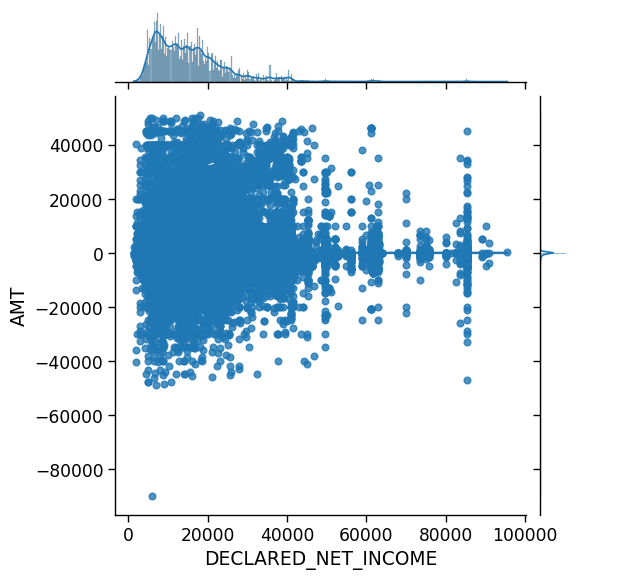

In [ ]:
#Amount (Amt) and Declared Net Income
sns.jointplot(data=df_train,x='DECLARED_NET_INCOME',y='AMT',kind='reg')

# Amount (Amt)and Declared_Income
There is just no relationship /connection beween Amount and Declared_Income .As indicated above, the true nature of this could be masked by the mix of Receipts and Payments in this . Thus its suggested that this be unpacked into separate two features of Receipts and Payaments .

## Multivariate


Multivariate analysis is required when more than two variables have to be analyzed simultaneously. It is a tremendously hard task for the human brain to visualize a relationship among 4 variables in a graph and thus multivariate analysis is used to study more complex sets of data. Types of Multivariate Analysis include Cluster Analysis, Factor Analysis, Multiple Regression Analysis, Principal Component Analysis, etc. I have hand picked a few simple ones:

<Axes: xlabel='CHANNEL', ylabel='DECLARED_NET_INCOME'>

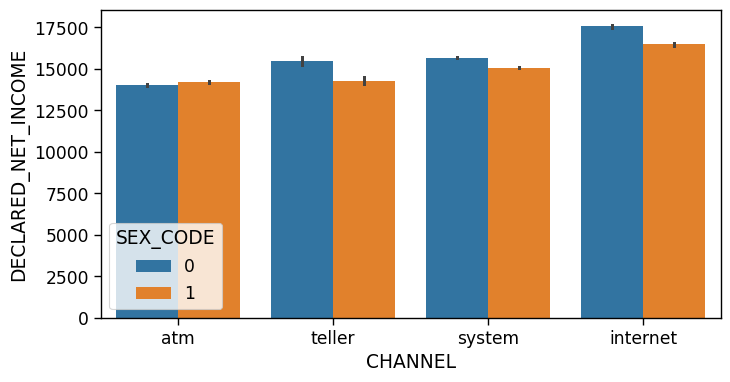

In [ ]:
# Declared Net Income,Channel and Gender
plt.figure(figsize=(8,4))
sns.set_context('paper',font_scale=1.4)
sns.barplot(data=df_train,x='CHANNEL',y='DECLARED_NET_INCOME',hue=df_train['SEX_CODE'].astype('category',copy=False))

# Declared Net Income,Occupational Status  and Gender comments
Channel is dominated by Internet and Gender Sex Code Zero (0), which is expected .

<Axes: xlabel='INCOME_GROUP_CODE', ylabel='DECLARED_NET_INCOME'>

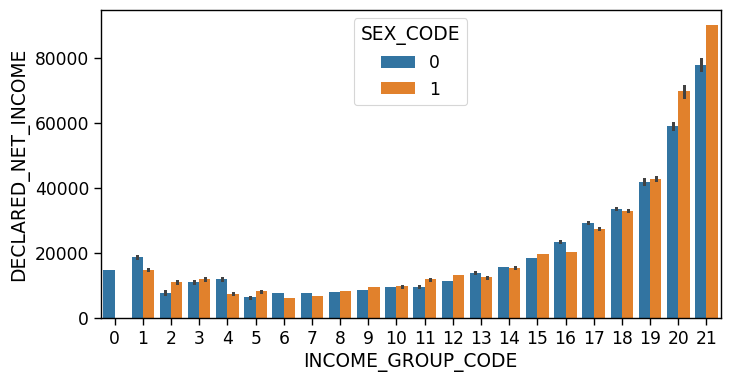

In [ ]:
#Declared Net Income,Income Group  and Gender
plt.figure(figsize=(8,4))
sns.set_context('paper',font_scale=1.4)
sns.barplot(data=df_train,x=df_train['INCOME_GROUP_CODE'].astype('category',copy=False),y='DECLARED_NET_INCOME',hue=df_train['SEX_CODE'].astype('category',copy=False))

# Declared Net Income,Income Group  and Gender comments
Higher Declared Income is predominatly by Gender Sex_Code 1 but in lower income group is equal or mainly Gender 0 .Also there to be positive correlation between Income Group and Declared Income

<Axes: xlabel='CHANNEL', ylabel='AMT'>

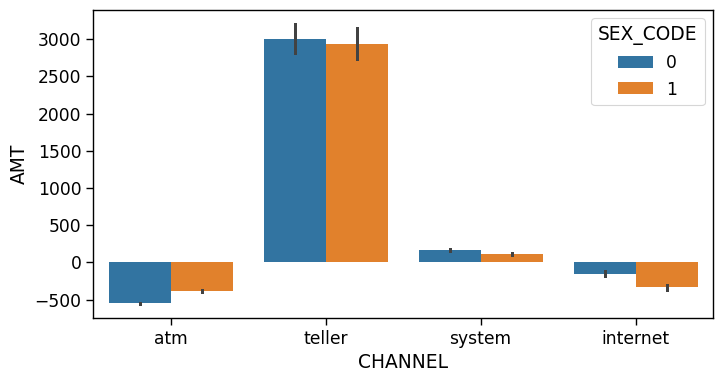

In [ ]:
#Channel, Amt and Gender
plt.figure(figsize=(8,4))
sns.set_context('paper',font_scale=1.4)
sns.barplot(data=df_train,x='CHANNEL',y='AMT',hue=df_train['SEX_CODE'].astype('category',copy=False))

# Channel, Amt and Gender comments
It seems the big chunk of positive amounts ( Deposits) are conducted by using direct physical teller and
slightly more driven by Gender code zero. One may wonder if these are cash business deposits ?

<Axes: xlabel='CHANNEL', ylabel='ACCOUNT_BALANCE'>

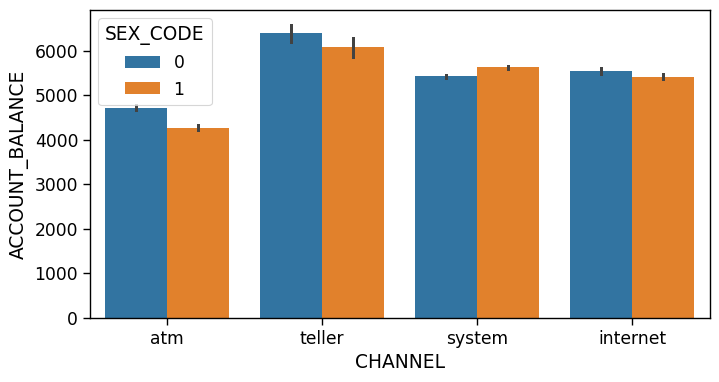

In [ ]:
# Channel , Account Balance and Gender
plt.figure(figsize=(8,4))
sns.set_context('paper',font_scale=1.4)
sns.barplot(data=df_train,x='CHANNEL',y='ACCOUNT_BALANCE',hue=df_train['SEX_CODE'].astype('category',copy=False))

# Channel , Account Balance and Gender comments
Same as the AMT (amount trancation above ), this is also largely driven through tellers .

<Axes: >

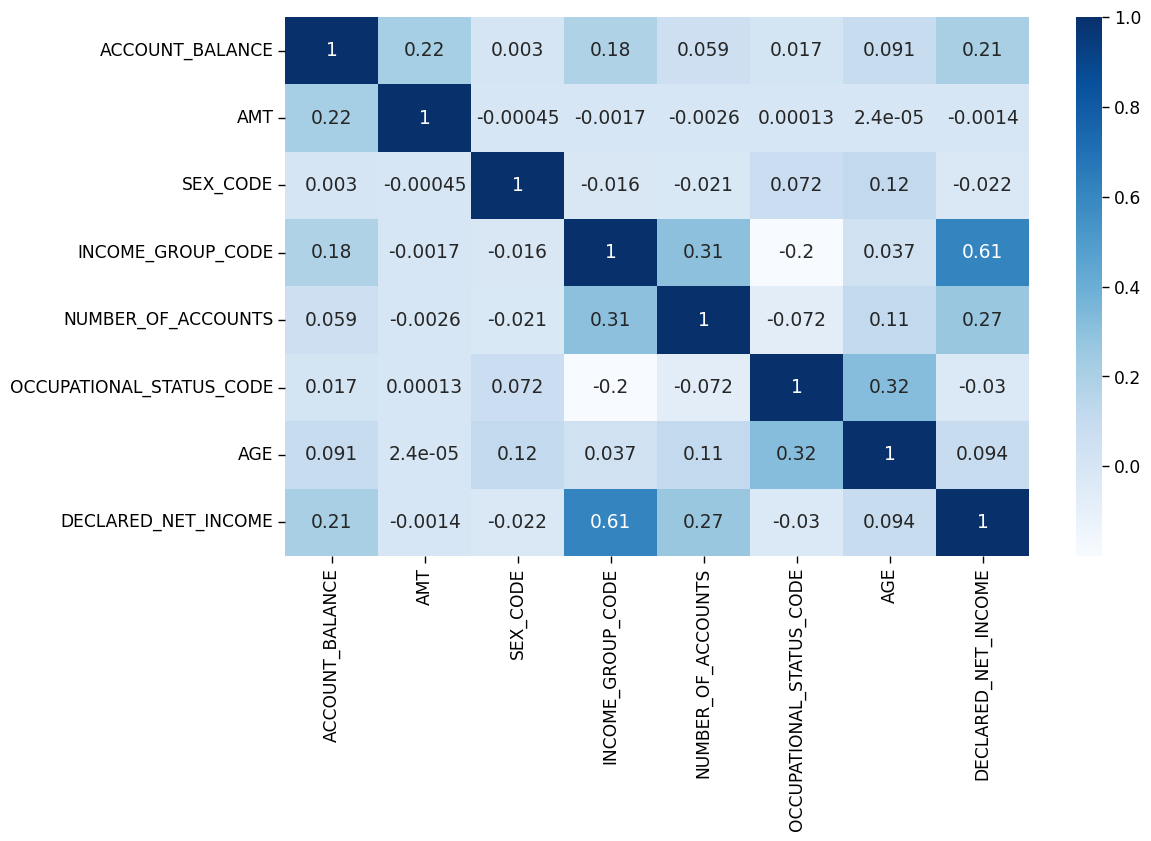

In [ ]:
# Heatmap
plt.figure(figsize=(12,7))
sns.set_context('paper',font_scale=1.4)
max_corr=df_train.drop(['EVENT_NUMBER'],axis=1).corr()
sns.heatmap(max_corr,annot =True ,cmap='Blues')

# Heatmap comments
Rule of thumb suggest that correlation of less than 0.25 is no relationship , between 0.25 and 0.5 is regarded as weak relationship , 0.5 and 0.75 is said to be moderate and greater than 0.75 is regarded as a strong relationship. The highest positive correlation is at 0.61 between Declared Income and Income Group Code , which is expected . There is some weak positive relatioship at 0.31 to 0.32 between number of accounts and Income_Group_Code, and Age and Occupational_Status_Code . So basically correlation between indepedent variables is not strong .

# 3. Supervised Machine Learning Model Training


# Base data set up

In [ ]:
df_train.columns

Index(['CUSTOMER_IDENTIFIER', 'RECORD_DATE_x', 'RECORD_DATE_y', 'PRODUCT_CODE',
       'CHANNEL', 'AMT', 'ACCOUNT_BALANCE', 'DATE_LAST_UPDATED', 'SEX_CODE',
       'INCOME_GROUP_CODE', 'NUMBER_OF_ACCOUNTS', 'OCCUPATIONAL_STATUS_CODE',
       'AGE', 'DECLARED_NET_INCOME'],
      dtype='object')

In [10]:
X=df_train3.drop(['CUSTOMER_IDENTIFIER','DECLARED_NET_INCOME','RECORD_DATE_x','RECORD_DATE_y','DATE_LAST_UPDATED'],axis=1)

In [11]:
y=df_train.DECLARED_NET_INCOME

# Random Forest - With Default Parameters


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Assume 'X' is the feature matrix and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor()

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred = rf_regressor.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
print("RMSE:", rmse)


RMSE: 2065.076697585663


# Random Forest - With Bayesian Optimization


In [ ]:
! pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 7.6 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV

# Define the parameter search space
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (1, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5)
}

# Initialize the Bayesian Optimization search
opt = BayesSearchCV(
    RandomForestRegressor(),
    param_space,
    n_iter=20,  # Number of iterations
    scoring='neg_root_mean_squared_error',  # Use negative RMSE as the objective to maximize
    n_jobs=-1  # Use all available CPU cores
)

# Perform hyperparameter optimization
opt.fit(X_train, y_train)

# Get the best model
best_model = opt.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (optimized model):", rmse)


RMSE (optimized model): 3863.1473280090904


Random Forest - Feature of Importance

In [ ]:
feature_importance = best_model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importance)

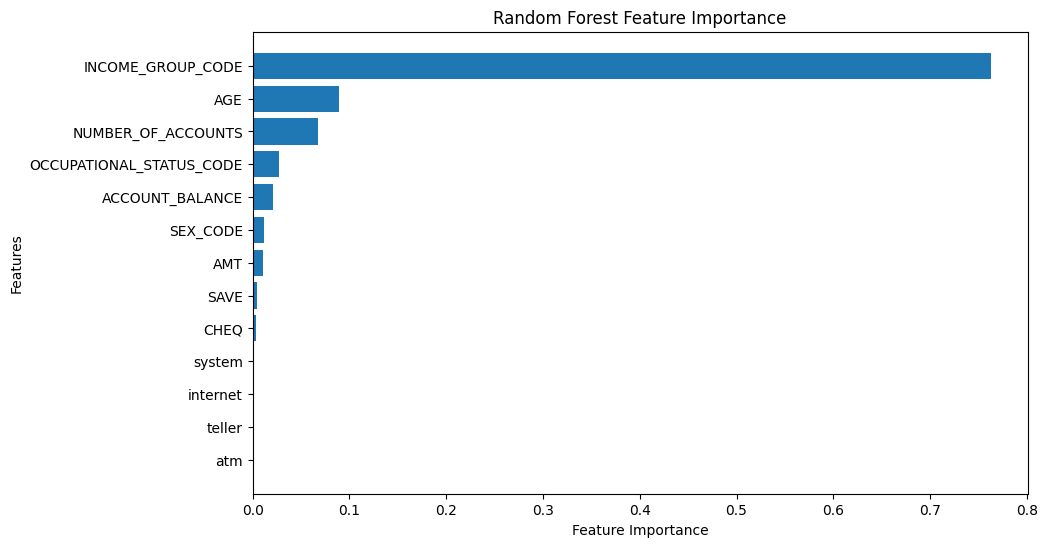

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.show()

#Neural Network


##Data Scaling


In [ ]:
X_train.columns

Index(['AMT', 'ACCOUNT_BALANCE', 'SEX_CODE', 'INCOME_GROUP_CODE',
       'NUMBER_OF_ACCOUNTS', 'OCCUPATIONAL_STATUS_CODE', 'AGE', 'CHEQ', 'SAVE',
       'atm', 'internet', 'system', 'teller'],
      dtype='object')

## Neural Network on scaled data


In [ ]:
#Data scaling
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the columns to scale and columns to leave as they are
columns_to_scale = ['ACCOUNT_BALANCE', 'NUMBER_OF_ACCOUNTS', 'OCCUPATIONAL_STATUS_CODE', 'AGE', 'AMT','INCOME_GROUP_CODE']
columns_to_leave = ['SEX_CODE','CHEQ', 'SAVE', 'atm', 'internet', 'system', 'teller']


# Create the transformers for scaling and leaving features
scaler = StandardScaler()
leaver = 'passthrough'  # To leave features as they are

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', scaler, columns_to_scale),
        ('leave', leaver, columns_to_leave)
    ])

# Apply the preprocessing to the data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


In [ ]:
from sklearn.neural_network import MLPRegressor
from skopt.space import Real, Categorical, Integer
from skopt.utils import use_named_args

# Define the objective function to optimize (negative RMSE)
@use_named_args([
    Integer(100, 200, name='hidden_layer_sizes'),
    Categorical(['relu', 'tanh'], name='activation'),
    Real(0.0001, 0.01, prior='log-uniform', name='alpha'),
    Real(0.001, 0.1, prior='log-uniform', name='learning_rate_init')
])
def objective(hidden_layer_sizes, activation, alpha, learning_rate_init):
    model = MLPRegressor(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        alpha=alpha,
        learning_rate_init=learning_rate_init
    )
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    return rmse

# Define the search space
search_spaces = {
    'hidden_layer_sizes': Integer(100, 200),
    'activation': Categorical(['relu', 'tanh']),
    'alpha': Real(0.0001, 0.01, prior='log-uniform'),
    'learning_rate_init': Real(0.001, 0.1, prior='log-uniform')
}

# Initialize the Bayesian Optimization search
opt = BayesSearchCV(
    estimator=MLPRegressor(),
    search_spaces=search_spaces,
    n_iter=20,
    scoring='neg_mean_squared_error',
    n_jobs=-1,verbose=0)

# Perform hyperparameter optimization
opt.fit(X_train_scaled, y_train)

# Get the best model
best_model = opt.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (optimized model):", rmse)


RMSE (optimized model): 4752.855226719353


In [ ]:
import tensorflow as tf
print(tf.test.gpu_device_name())

# Support Vector Regressor

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

# Define the parameter search space
param_space = {
    'C': Real(0.1, 5, prior='log-uniform'),
    'gamma': Real(0.01, 1.0, prior='log-uniform'),
    'kernel': Categorical(['linear', 'rbf'])
}

# Define the objective function to optimize (negative RMSE)
def objective(params):
    C = params['C']
    gamma = params['gamma']
    kernel = params['kernel']

    model = SVR(C=C, gamma=gamma, kernel=kernel)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return -rmse

# Initialize the Bayesian Optimization search
opt = BayesSearchCV(
    estimator=SVR(),
    search_spaces=param_space,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    n_iter=50,  # Number of iterations for the optimization
    cv=5,
    random_state=42)

# Perform hyperparameter optimization
opt.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = opt.best_estimator_
best_params = opt.best_params_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Best Model Hyperparameters:", best_params)
print("Root Mean Squared Error (RMSE):", rmse)


# Linear Regression


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the parameter search space
param_space = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

# Initialize the Bayesian Optimization search
opt = BayesSearchCV(
    estimator=LinearRegression(),
    search_spaces=param_space,
    scoring='neg_root_mean_squared_error',
    n_iter=50,
    cv=5,
    random_state=42
)

# Perform hyperparameter optimization
opt.fit(X_train_scaled, y_train)

# Get the best model and make predictions on the test data
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate RMSE on the test data
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 6859.771482207741


# Decision Tree Regressor


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define the parameter search space
param_space = {
    'max_depth': (1, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5),
    'max_features': (1, X.shape[1])
}

# Create a decision tree regressor model
model = DecisionTreeRegressor()

# Initialize the Bayesian Optimization search
opt = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    scoring='neg_mean_squared_error',
    n_iter=50,
    cv=5,
    random_state=42
)

# Perform hyperparameter optimization
opt.fit(X_train_scaled, y_train)

# Get the best model and make predictions on the test data
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Calculate the RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)


Root Mean Squared Error (RMSE): 4116.602703087979


# XG Boost

In [ ]:
from xgboost import XGBRegressor


# Define the parameter search space
param_space = {
    'max_depth': (1, 10),
    'learning_rate': (0.01, 1.0, 'log-uniform'),
    'n_estimators': (50, 200),
    'gamma': (0, 5),
    'subsample': (0.5, 1.0, 'uniform'),
    'colsample_bytree': (0.5, 1.0, 'uniform'),
}

# Create an XGBoost regressor model
model = XGBRegressor()

# Initialize the Bayesian Optimization search
opt = BayesSearchCV(
    estimator=model,
    search_spaces=param_space,
    scoring='neg_mean_squared_error',
    n_iter=50,
    cv=5,
    random_state=42
)

# Perform hyperparameter optimization
opt.fit(X_train_scaled, y_train)

# Get the best model and make predictions on the test data
XGbest_model = opt.best_estimator_
XGy_pred = XGbest_model.predict(X_test_scaled)

# Calculate the RMSE
XGmse = mean_squared_error(y_test, XGy_pred)
XGrmse = np.sqrt(XGmse)
print("Root Mean Squared Error (XGRMSE):", XGrmse)


Root Mean Squared Error (XGRMSE): 2251.9071881863983


#XG Boost Regressor - Feature of Importance

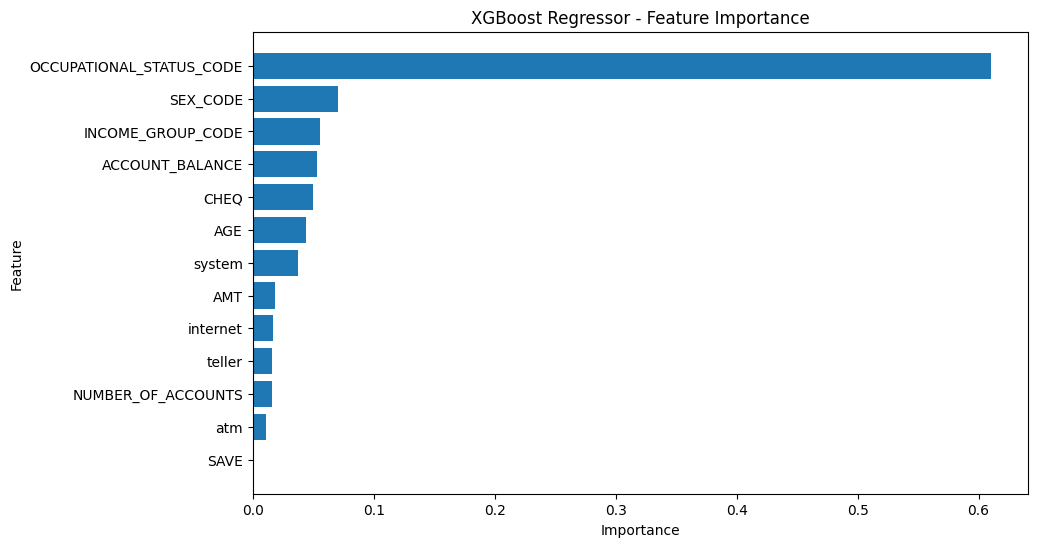

In [ ]:
import xgboost as xgb
feature_names=X_train.columns
# Train the XGBoost model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

# Get feature importances
importance = xgb_model.feature_importances_

# Create a dataframe with feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': feature_names,
                                       'Importance': importance})

# Sort the dataframe by importance values
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=True)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Regressor - Feature Importance')
plt.show()


# KNN Regressor


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from skopt.space import Integer, Categorical, Real

# Define the parameter search space
param_space = {
    'n_neighbors': Integer(1, 10),
    'weights': Categorical(['uniform', 'distance']),
    'p': Integer(1, 2),
}

# Define the objective function to optimize (negative RMSE)
def objective(params):
    model = KNeighborsRegressor(**params)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    return -rmse

# Perform hyperparameter optimization
opt = BayesSearchCV(
    estimator=KNeighborsRegressor(),
    search_spaces=param_space,
    scoring='neg_root_mean_squared_error',
    n_iter=20,
    random_state=42,
    n_jobs=-1,
)
opt.fit(X_train_scaled, y_train)

# Get the best model and make predictions on the test data
best_model = opt.best_estimator_
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Best parameters:", opt.best_params_)
print("RMSE:", rmse)


Best parameters: OrderedDict([('n_neighbors', 5), ('p', 2), ('weights', 'distance')])
RMSE: 4270.355274444978


# Gradient Boosting Regressor


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Define the parameter search space
param_space = {
    'learning_rate': Real(0.01, 1.0, prior='log-uniform', name='learning_rate'),
    'n_estimators': Integer(100, 500, name='n_estimators'),
    'max_depth': Integer(2, 10, name='max_depth'),
    'min_samples_split': Integer(2, 20, name='min_samples_split'),
    'min_samples_leaf': Integer(1, 10, name='min_samples_leaf'),
}

# Define the objective function to optimize (negative RMSE)
def objective(learning_rate, n_estimators, max_depth, min_samples_split, min_samples_leaf):
    model = GradientBoostingRegressor(
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    return -rmse

# Initialize the Bayesian Optimization search
opt = BayesSearchCV(
    estimator=GradientBoostingRegressor(),
    search_spaces=param_space,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    n_iter=50,
    random_state=42
)

# Perform hyperparameter optimization
opt.fit(X_train_scaled, y_train)

# Get the best model and make predictions on the test data
GBbest_model = opt.best_estimator_
GBy_pred = GBbest_model.predict(X_test_scaled)
GBrmse = np.sqrt(mean_squared_error(y_test, GBy_pred))

print("Best gbRMSE:", GBrmse)
print("Best parameters:", opt.best_params_)


Best gbRMSE: 2183.8939692541985
Best parameters: OrderedDict([('learning_rate', 0.2027803769912316), ('max_depth', 10), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 335)])


# Gradient Booster Regressor - Feature of Importance


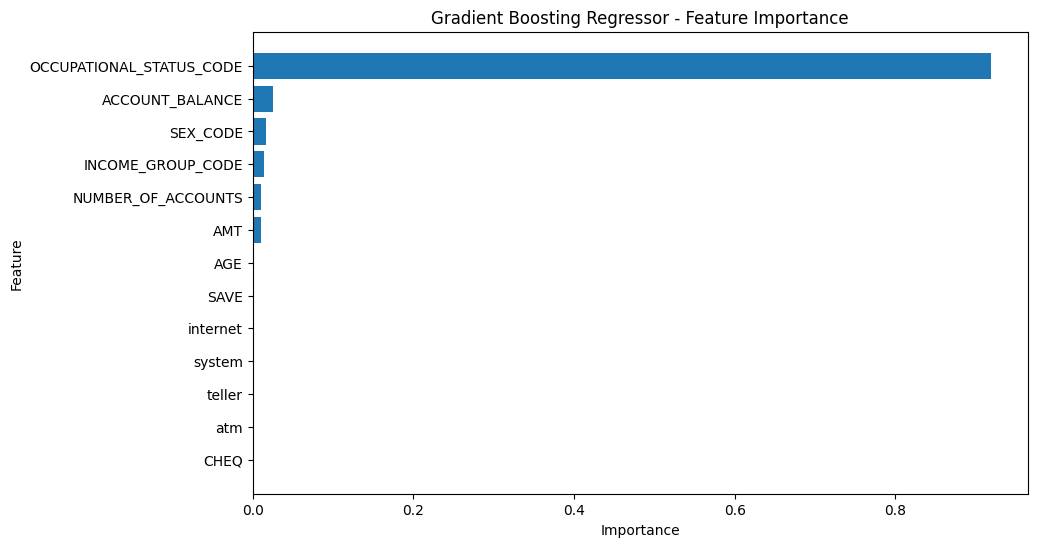

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

feature_names=X_train.columns
# Initialize the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Fit the regressor to the data
gb_regressor.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = gb_regressor.feature_importances_

# Create a dataframe with feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': feature_names,
                                       'Importance': feature_importances})

# Sort the dataframe by importance values
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=True)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Gradient Boosting Regressor - Feature Importance')
plt.show()


# Random Forest Scaled with Bayesian Optimisation


In [ ]:
from skopt import BayesSearchCV

# Define the parameter search space
param_space = {
    'n_estimators': (100, 500),
    'max_depth': (1, 10),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5)
}

# Initialize the Bayesian Optimization search
opt = BayesSearchCV(
    RandomForestRegressor(),
    param_space,
    n_iter=20,  # Number of iterations
    scoring='neg_root_mean_squared_error',  # Use negative RMSE as the objective to maximize
    n_jobs=-1  # Use all available CPU cores
)

# Perform hyperparameter optimization
opt.fit(X_train_scaled, y_train)

# Get the best model
best_model = opt.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE (optimized model):", rmse)


RMSE (optimized model): 4438.959796700668


Random Forest Default Scaled

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Train the model
rf_regressor.fit(X_train_scaled, y_train)

# Make predictions
RFy_pred = rf_regressor.predict(X_test_scaled)

# Calculate RMSE
RFmse = mean_squared_error(y_test, RFy_pred)
RFrmse=np.sqrt(RFmse)
print("rfRMSE:", RFrmse)

rfRMSE: 2052.6047323545913


#Random Forest Scaled - Feature of Importance

In [ ]:
feature_importance = rf_regressor.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importance)

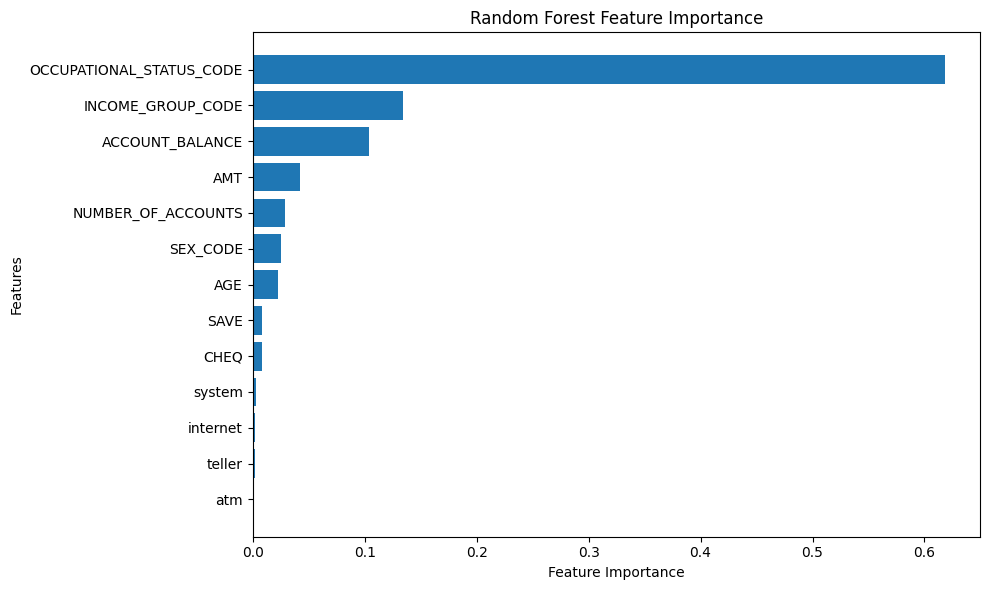

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.yticks(range(len(feature_importance)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.savefig('feature.png')
plt.show()

# 4. Prediction and Submission on the given Test Dataset


##Base Test Dataset


In [ ]:
df_test.head()

,CUSTOMER_IDENTIFIER,RECORD_DATE_x,RECORD_DATE_y,AMT,ACCOUNT_BALANCE,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,CHEQ,SAVE,atm,internet,system,teller
0,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,2022-06,2022-06-30 00:00:00+02:00,-300.0,700.00,2022-09,1,17,19,1,28,1,0,1,0,0,0
1,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,2022-06,2022-06-30 00:00:00+02:00,1000.0,1000.00,2022-09,1,17,19,1,28,1,0,0,0,0,1
2,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,2022-01,2021-07-31 00:00:00+02:00,-11497.0,83320.56,2022-07,0,12,11,1,40,1,0,1,0,0,0
3,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,2022-01,2021-07-31 00:00:00+02:00,16632.0,204207.77,2022-07,0,12,11,1,40,1,0,0,0,1,0
4,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,2022-01,2021-08-31 00:00:00+02:00,-3022.0,205361.14,2022-07,0,12,11,1,40,1,0,1,0,0,0


##One Hot Encoding


In [ ]:
# Perform one-hot encoding
PRODUCT = pd.get_dummies(df_test['PRODUCT_CODE'])
CHANNEL = pd.get_dummies(df_test['CHANNEL'])

# Drop the original categorical columns
df_test = df_test.drop(['PRODUCT_CODE', 'CHANNEL'], axis=1)

# Concatenate the encoded columns with the original DataFrame
df_test = pd.concat([df_test, PRODUCT, CHANNEL], axis=1)

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24563 entries, 0 to 24562
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype                                
---  ------                    --------------  -----                                
 0   CUSTOMER_IDENTIFIER       24563 non-null  object                               
 1   RECORD_DATE_x             24563 non-null  object                               
 2   RECORD_DATE_y             24563 non-null  datetime64[ns, pytz.FixedOffset(120)]
 3   AMT                       24563 non-null  float64                              
 4   ACCOUNT_BALANCE           24563 non-null  float64                              
 5   DATE_LAST_UPDATED         24563 non-null  object                               
 6   SEX_CODE                  24563 non-null  int64                                
 7   INCOME_GROUP_CODE         24563 non-null  int64                                
 8   NUMBER_OF_ACCOUNTS        24563 non-

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the columns to scale and columns to leave as they are
columns_to_scale = ['ACCOUNT_BALANCE', 'NUMBER_OF_ACCOUNTS', 'OCCUPATIONAL_STATUS_CODE', 'AGE', 'AMT','INCOME_GROUP_CODE']
columns_to_leave = ['SEX_CODE','CHEQ', 'SAVE', 'atm', 'internet', 'system', 'teller']


# Create the transformers for scaling and leaving features
scaler = StandardScaler()
leaver = 'passthrough'  # To leave features as they are

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('scale', scaler, columns_to_scale),
        ('leave', leaver, columns_to_leave)
    ])

# Apply the preprocessing to the data
df_test_scaled = preprocessor.fit_transform(df_test)


In [ ]:
# Get the predicted values for the scaled test features
RFy_pred_scaled = rf_regressor.predict(df_test_scaled)

In [ ]:
# Add the predicted scaled features to the DataFrame
df_test['DECLARED_NET_INCOME'] = RFy_pred_scaled

In [ ]:
df_test.head()

,CUSTOMER_IDENTIFIER,RECORD_DATE_x,RECORD_DATE_y,AMT,ACCOUNT_BALANCE,DATE_LAST_UPDATED,SEX_CODE,INCOME_GROUP_CODE,NUMBER_OF_ACCOUNTS,OCCUPATIONAL_STATUS_CODE,AGE,CHEQ,SAVE,atm,internet,system,teller,PredictedIncome,DECLARED_NET_INCOME
0,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,2022-06,2022-06-30 00:00:00+02:00,-300.0,700.00,2022-09,1,17,19,1,28,1,0,1,0,0,0,13747.0,13747.0
1,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,2022-06,2022-06-30 00:00:00+02:00,1000.0,1000.00,2022-09,1,17,19,1,28,1,0,0,0,0,1,13524.0,13524.0
2,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,2022-01,2021-07-31 00:00:00+02:00,-11497.0,83320.56,2022-07,0,12,11,1,40,1,0,1,0,0,0,13747.0,13747.0
3,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,2022-01,2021-07-31 00:00:00+02:00,16632.0,204207.77,2022-07,0,12,11,1,40,1,0,0,0,1,0,13691.0,13691.0
4,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,2022-01,2021-08-31 00:00:00+02:00,-3022.0,205361.14,2022-07,0,12,11,1,40,1,0,1,0,0,0,13747.0,13747.0


In [ ]:
df_SampleSub.shape

(1544, 2)

In [ ]:
# Specify the columns to include from each file
df_SampleSub_columns = ['CUSTOMER_IDENTIFIER', 'DECLARED_NET_INCOME']
df_test_columns = ['CUSTOMER_IDENTIFIER', 'DECLARED_NET_INCOME']

# Merge the DataFrames based on the 'ID' column and include specific columns
df_SampleSub = pd.merge(df_SampleSub[df_SampleSub_columns],df_test[df_test_columns], on='CUSTOMER_IDENTIFIER')

# Display the merged DataFrame
df_SampleSub.head()

,CUSTOMER_IDENTIFIER,DECLARED_NET_INCOME_x,DECLARED_NET_INCOME_y
0,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,0,13747.0
1,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,0,13524.0
2,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,0,13747.0
3,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,0,13691.0
4,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,0,13747.0


In [ ]:
df_SampleSub = df_SampleSub.drop('DECLARED_NET_INCOME_x', axis=1).rename(columns={'DECLARED_NET_INCOME_y': 'DECLARED_NET_INCOME'})
df_SampleSub.head()

,CUSTOMER_IDENTIFIER,DECLARED_NET_INCOME
0,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,13747.0
1,ID_005e5c1206b2d9857432a381df19989353c3e1b6b0d...,13524.0
2,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,13747.0
3,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,13691.0
4,ID_c28fb2d93c7b4be50a57aa7ebbe31a6bae33a18e1c6...,13747.0


In [ ]:
df_SampleSub.shape

(24563, 2)

#5. Conclusion on the Nine(9) Models tested
- Random Forest Scaled Default  RMSE is **2043** , wherereas the unscaled default offers RMSE **2054** .
- Gradient Boost with Bayesian Optimisation offers RMSE **2184** and
- XG Boost with Bayesian Optimisation  results in RMSE OF **2252** .
###The Bayesian Optimised hyperparameters did not improve the models ,infact they got worse.
###So based on the above I would go forward with the simple scaled  default Random Forest.

In [13]:
from prettytable import PrettyTable

# Create a table object
table = PrettyTable()

# Define table headers
table.field_names = ["Model", "RMSE"]

# Add rows to the table
table.add_row(["Random Forest with Default parameters ", 2053])
table.add_row(["Gradient Boost with Bayesian Optimisation ", 2184])
table.add_row(["XG Boost with Bayesian Optimisation ", 2252])
table.add_row(["Decision Tree with Bayesian Optimisation ", 4117])
table.add_row(["KNN with Bayesian Optimisation ", 4270])
table.add_row(["Random Forest with Bayesian Optimisation ", 4439])
table.add_row(["MLP with Bayesian Optimisation ", 4752])
table.add_row(["Linear Regression with Bayesian Optimisation ", 6860])
table.add_row(["Support Vector with Bayesian Optimisation ", "crashed"])

# Save the table to a file
with open("table.txt", "w") as file:
    file.write(str(table))
# Print the table
print(table)

+-----------------------------------------------+---------+
|                     Model                     |   RMSE  |
+-----------------------------------------------+---------+
|     Random Forest with Default parameters     |   2053  |
|   Gradient Boost with Bayesian Optimisation   |   2184  |
|      XG Boost with Bayesian Optimisation      |   2252  |
|   Decision Tree with Bayesian Optimisation    |   4117  |
|        KNN with Bayesian Optimisation         |   4270  |
|   Random Forest with Bayesian Optimisation    |   4439  |
|        MLP with Bayesian Optimisation         |   4752  |
| Linear Regression with Bayesian Optimisation  |   6860  |
|   Support Vector with Bayesian Optimisation   | crashed |
+-----------------------------------------------+---------+


## Prepared by
#Patrick Malaza
# email : pmalaza@icloud.com